In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fire Data Analysis

In [20]:
# --- FIRE DATA EXPLORATION ---

# Load processed fire data
fires = pd.read_csv("../data/processed/Fire/combined_fire_data_2024.csv")
print(fires.shape)
fires.head()



(90250, 15)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2


In [21]:
# show column names and data types
print(fires.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90250 entries, 0 to 90249
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    90250 non-null  float64
 1   longitude   90250 non-null  float64
 2   bright_ti4  90250 non-null  float64
 3   scan        90250 non-null  float64
 4   track       90250 non-null  float64
 5   acq_date    90250 non-null  object 
 6   acq_time    90250 non-null  int64  
 7   satellite   90250 non-null  object 
 8   instrument  90250 non-null  object 
 9   confidence  90250 non-null  object 
 10  version     90250 non-null  int64  
 11  bright_ti5  90250 non-null  float64
 12  frp         90250 non-null  float64
 13  daynight    90250 non-null  object 
 14  type        90250 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 10.3+ MB
None


In [22]:
# show some basic statistics
print(fires.describe())

           latitude     longitude    bright_ti4          scan         track  \
count  90250.000000  90250.000000  90250.000000  90250.000000  90250.000000   
mean      31.476760      6.280033    321.091793      0.475991      0.515446   
std        2.666477      2.593748     18.205551      0.101596      0.126508   
min       19.603230     -8.118050    240.170000      0.320000      0.360000   
25%       28.911510      5.642160    305.380000      0.400000      0.390000   
50%       31.409125      6.557880    316.710000      0.450000      0.490000   
75%       32.560313      8.083758    337.400000      0.540000      0.620000   
max       37.323460     11.110350    367.000000      0.800000      0.780000   

           acq_time  version    bright_ti5           frp          type  
count  90250.000000  90250.0  90250.000000  90250.000000  90250.000000  
mean     380.331623      2.0    291.726092      3.447776      1.690936  
std      480.710563      0.0     11.700269      5.222111      0.73520

In [23]:
# columns
fires.columns

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type'],
      dtype='object')

In [24]:
# check for missing values
print("missing values per column:")
print(fires.isnull().sum())

missing values per column:
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64


### Univariate Analysis

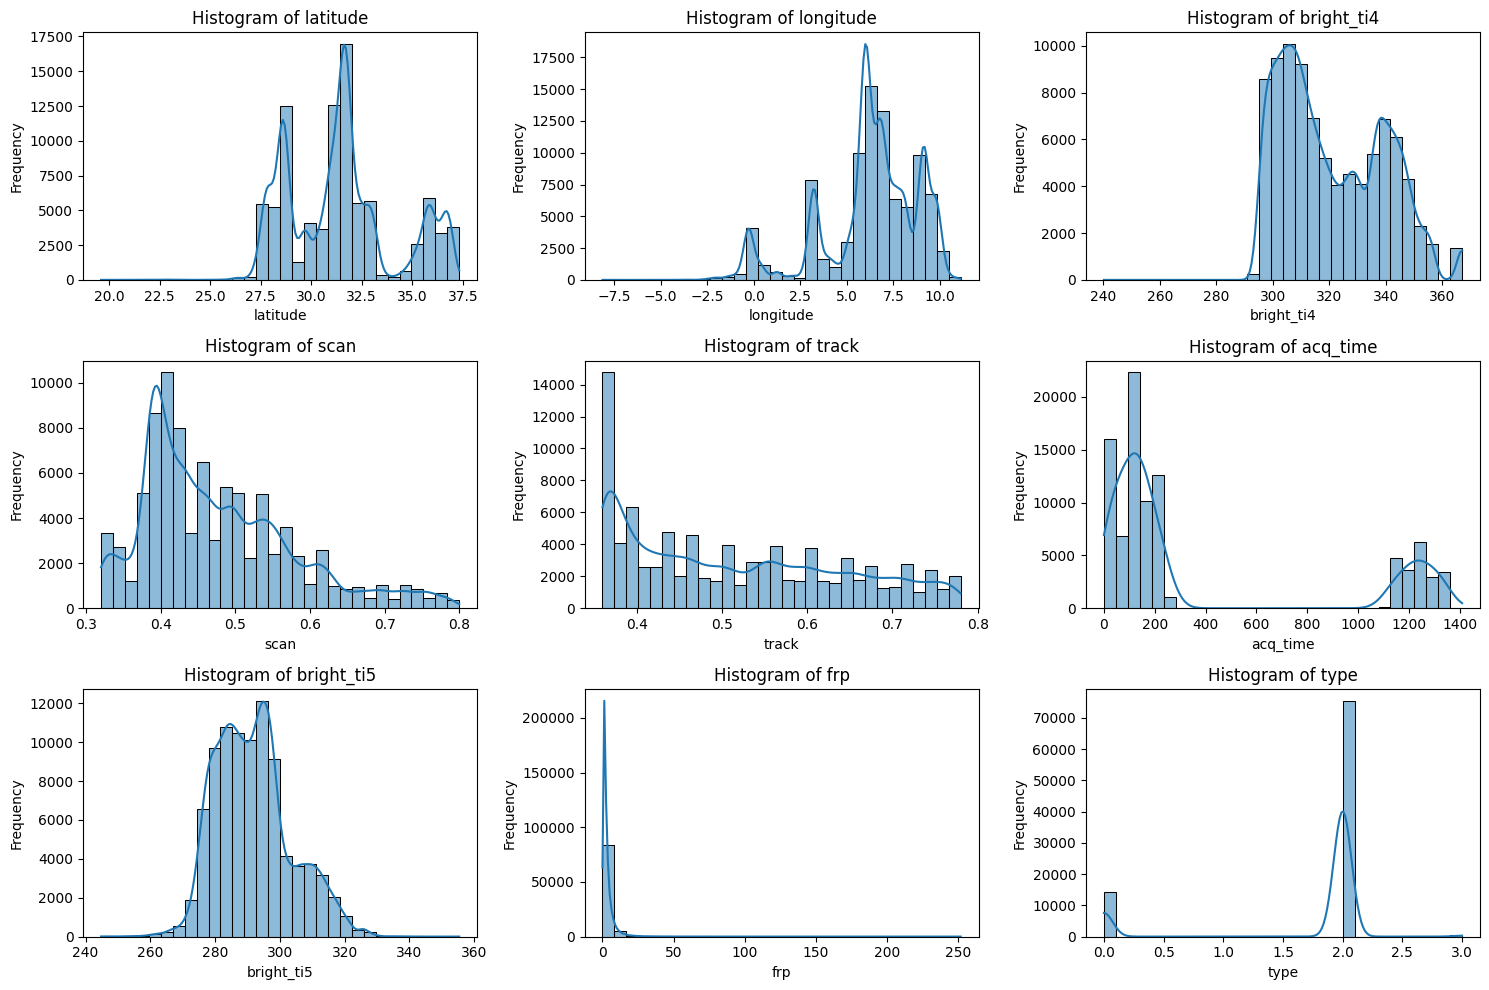

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#numeric_cols = ["brightness", "FRP", "confidence"]
numeric_cols = fires.select_dtypes(include=['float64', 'int64']).columns
# except type
numeric_cols = [col for col in numeric_cols if col not in ['version']]

# histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(fires[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




In [26]:
fires[numeric_cols].describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp,type
count,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000,90250.000000
mean,31.476760,6.280033,321.091793,0.475991,0.515446,380.331623,291.726092,3.447776,1.690936
std,2.666477,2.593748,18.205551,0.101596,0.126508,480.710563,11.700269,5.222111,0.735207
min,19.603230,-8.118050,240.170000,0.320000,0.360000,0.000000,244.790000,0.060000,0.000000
25%,28.911510,5.642160,305.380000,0.400000,0.390000,59.000000,282.900000,1.150000,2.000000
50%,31.409125,6.557880,316.710000,0.450000,0.490000,140.000000,290.790000,2.060000,2.000000
75%,32.560313,8.083758,337.400000,0.540000,0.620000,232.000000,298.100000,3.920000,2.000000
max,37.323460,11.110350,367.000000,0.800000,0.780000,1410.000000,355.420000,251.890000,3.000000


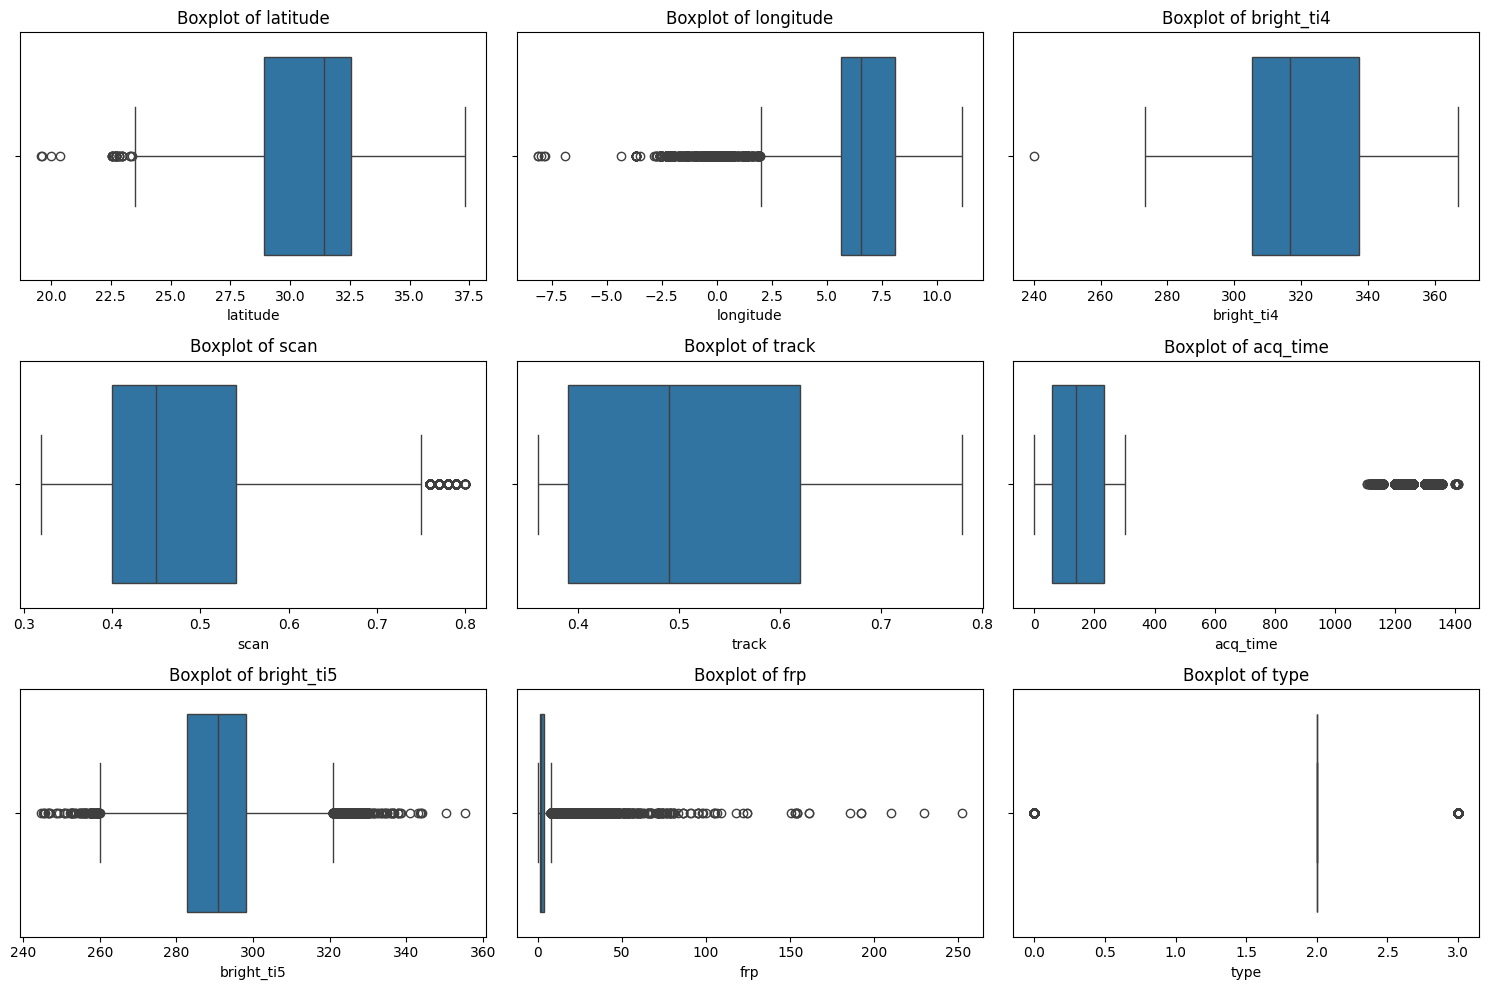

In [27]:
# plot boxes for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=fires[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [28]:
# print possible values for each categorical column
categorical_columns = ['satellite', 'instrument', 'confidence', 'version', 'daynight', 'type']
for col in categorical_columns:
    print(f"Possible values for {col}: {fires[col].unique()}")

Possible values for satellite: ['N20']
Possible values for instrument: ['VIIRS']
Possible values for confidence: ['n' 'h' 'l']
Possible values for version: [2]
Possible values for daynight: ['N' 'D']
Possible values for type: [2 0 3]


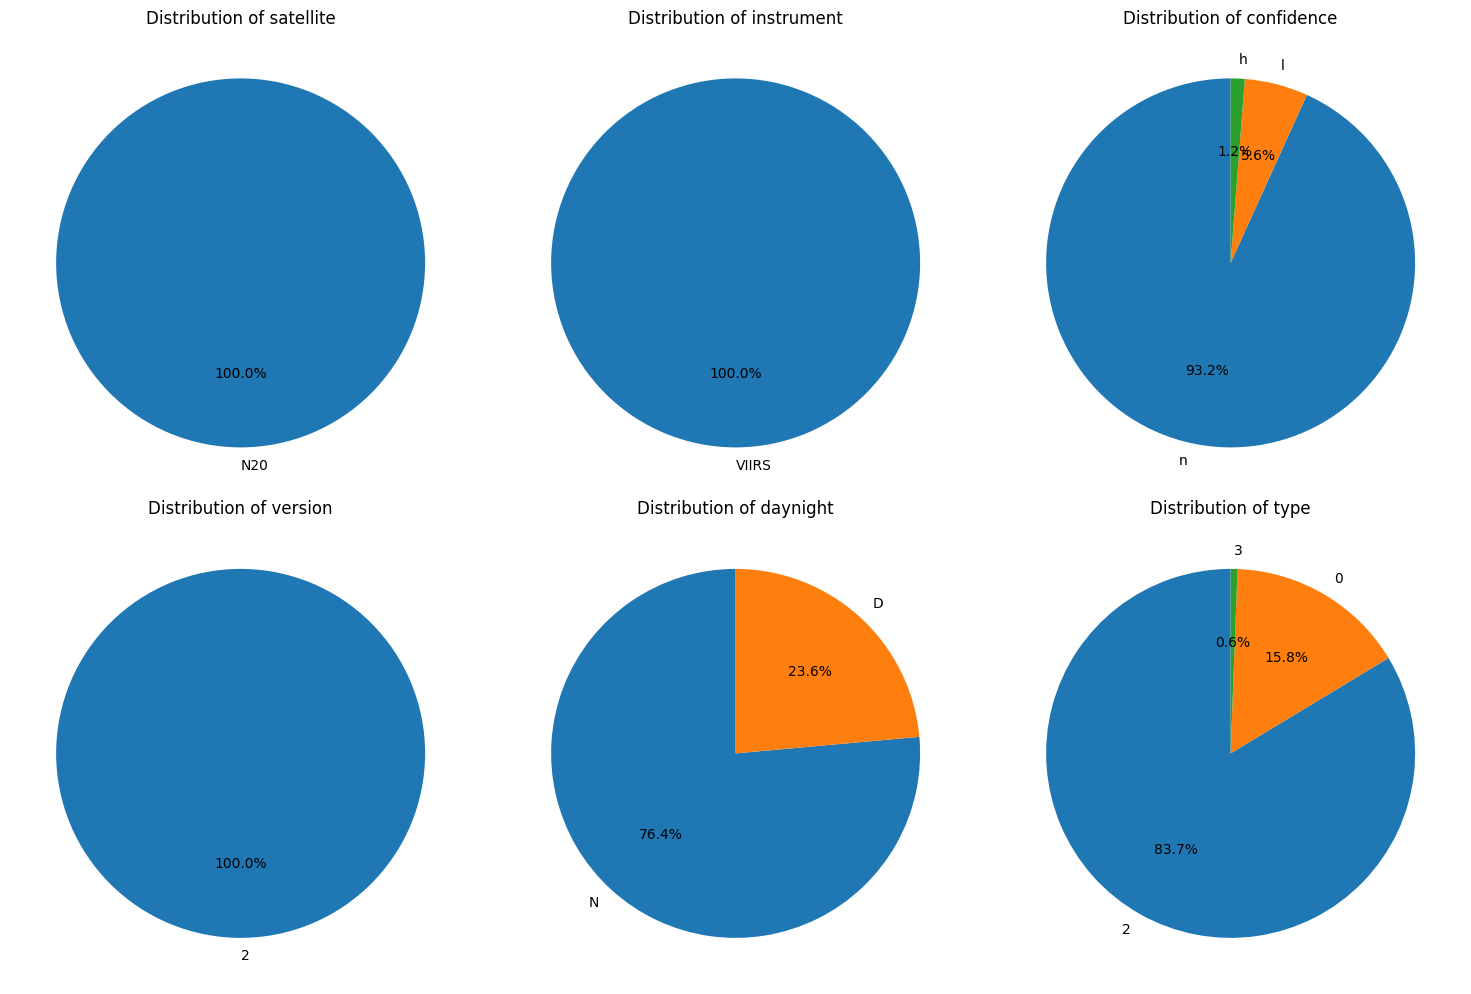

In [29]:
# plot the pie chart for all categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i+1)
    fires[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
plt.tight_layout()
plt.show()


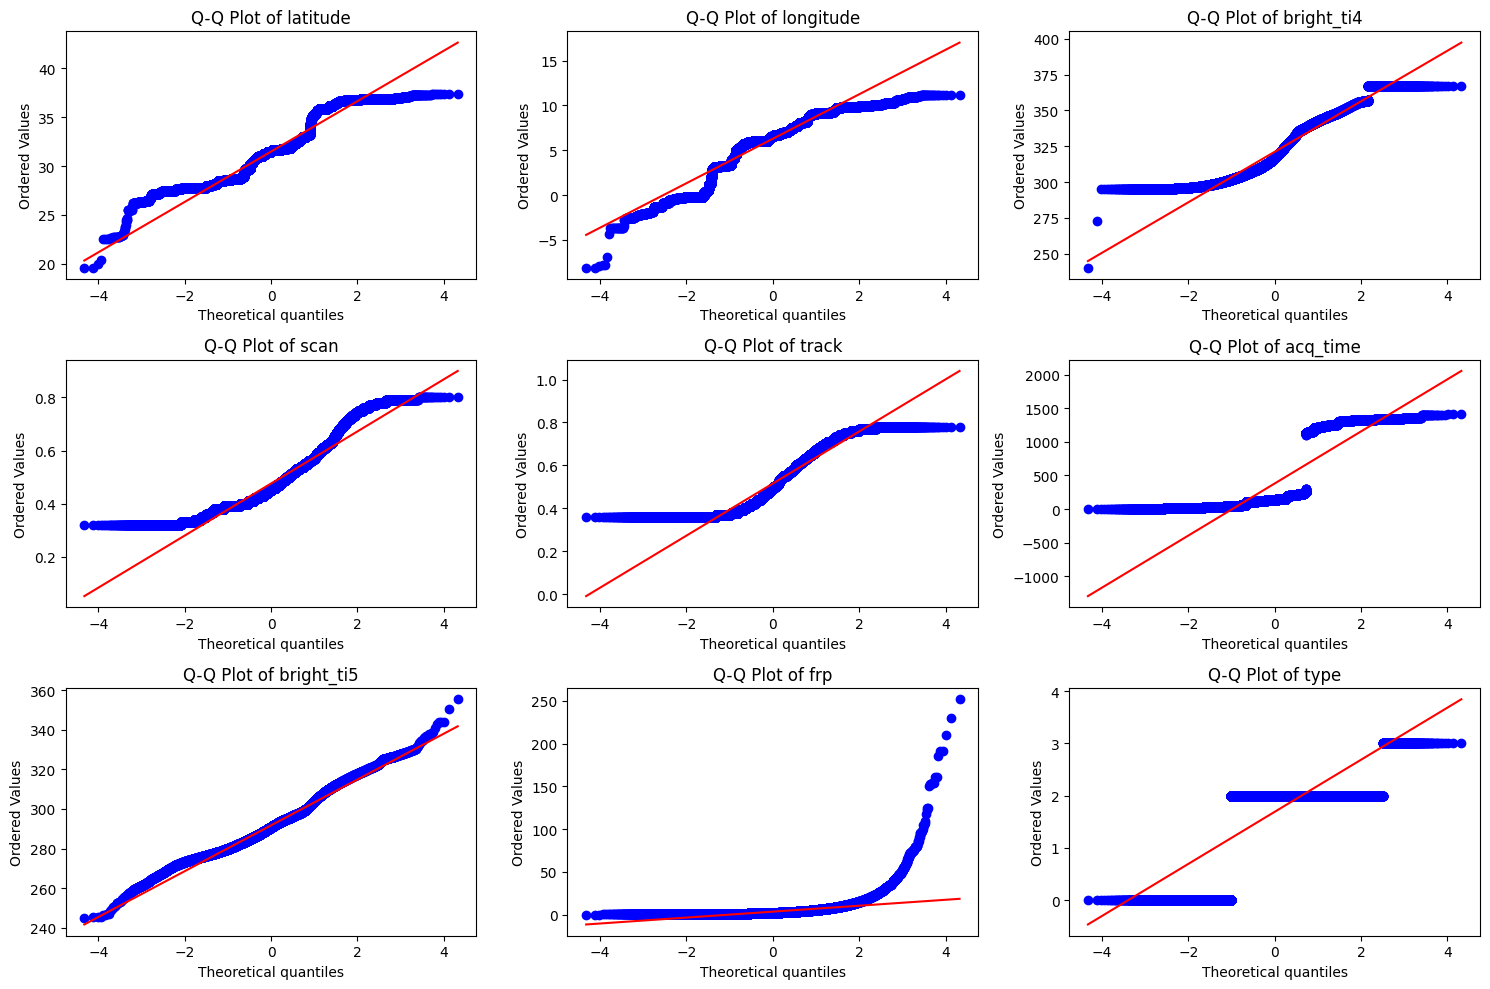

In [30]:
# Q-Q plots for numeric columns
import scipy.stats as stats

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    stats.probplot(fires[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
plt.tight_layout()
plt.show()

### Temporal Analysis

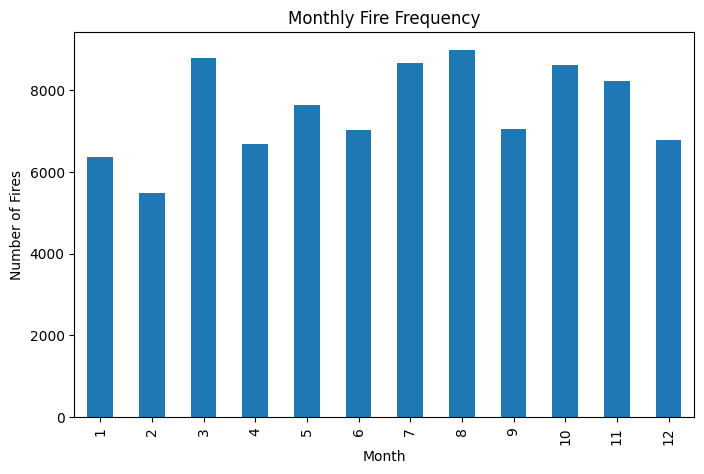

In [31]:
fires['acq_date'] = pd.to_datetime(fires['acq_date'])
fires['month'] = fires['acq_date'].dt.month

monthly_counts = fires.groupby('month').size()
monthly_counts.plot(kind='bar', figsize=(8,5), title='Monthly Fire Frequency')
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()


### Spatial Analysis

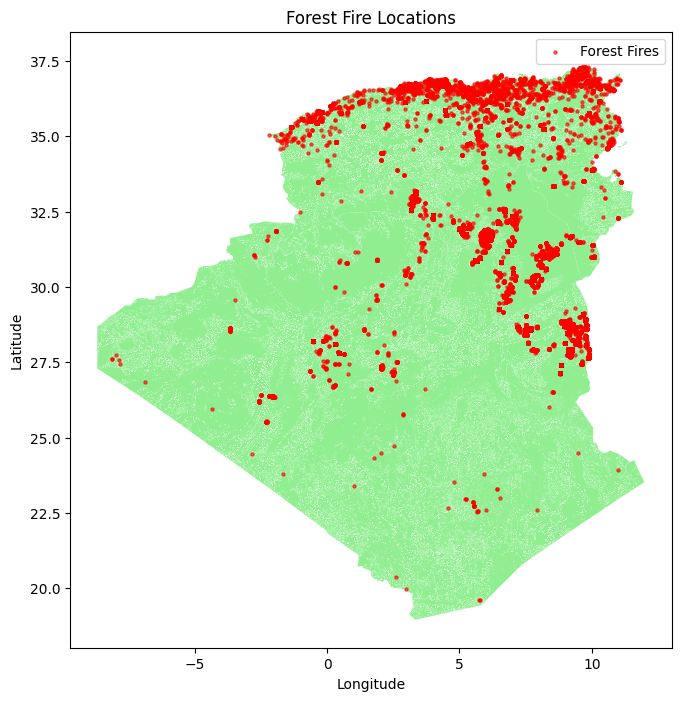

In [32]:
# spacial distribution plot
def plot_fires(fires_csv, shapefile):
    df = pd.read_csv(fires_csv)

    gdf_fires = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"  # WGS84 (lat/lon)
    )
    gdf_algeria = gpd.read_file(shapefile)

    if gdf_fires.crs != gdf_algeria.crs:
        gdf_fires = gdf_fires.to_crs(gdf_algeria.crs)

    fig, ax = plt.subplots(figsize=(8, 8))
    gdf_algeria.plot(ax=ax, color='lightgreen')
    gdf_fires.plot(ax=ax, color='red', markersize=5, alpha=0.6, label='Forest Fires')

    plt.title("Forest Fire Locations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

# Example usage for Algeria
fires_csv = "../data/processed/Fire/combined_fire_data_2024.csv"
shapefile = "../data/raw/Land Cover/combined/combined_landcover.shp"
plot_fires(fires_csv, shapefile)


### Correlation Analysis

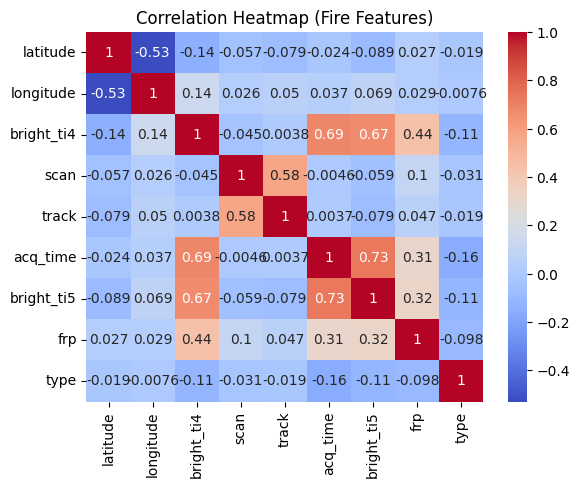

In [33]:
corr = fires[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Fire Features)")
plt.show()


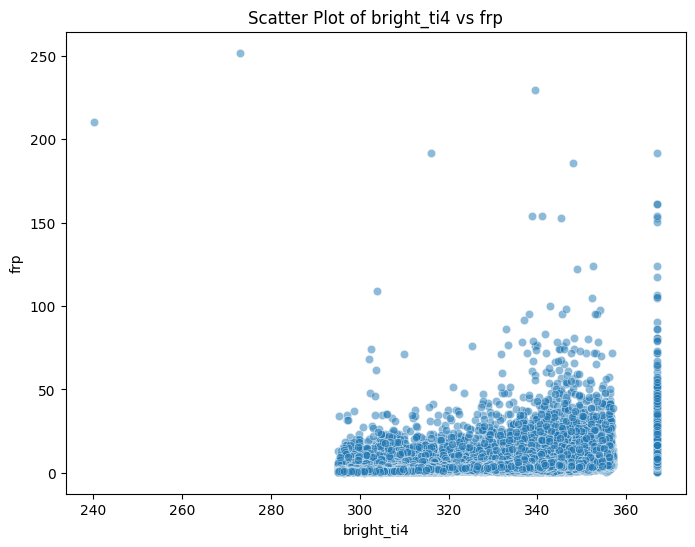

In [34]:
# scatter plot for two selected columns

feature1 = 'bright_ti4'
feature2 = 'frp'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=fires, x=feature1, y=feature2, alpha=0.5)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

### 2. Land Cover Analysis

In [35]:
import geopandas as gpd

# Load shapefile
landcover = gpd.read_file("../data/raw/Land Cover/combined/combined_landcover.shp")

print(landcover.info())
print("\n")
print(landcover.head())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438513 entries, 0 to 438512
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   ID         438513 non-null  int32   
 1   GRIDCODE   438513 non-null  int32   
 2   AREA       386454 non-null  float64 
 3   LCCCODE    386454 non-null  object  
 4   AREA_M2    52059 non-null   float64 
 5   LCCCode_1  52059 non-null   object  
 6   geometry   438513 non-null  geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 20.1+ MB
None


   ID  GRIDCODE          AREA       LCCCODE  AREA_M2 LCCCode_1  \
0   4       210  6.228187e+06  7001 // 8001      NaN      None   
1   2       210  6.242408e+06  7001 // 8001      NaN      None   
2   1       210  1.482995e+06  7001 // 8001      NaN      None   
3   8        50  4.590841e+08  21497-121340      NaN      None   
4  13       210  6.371533e+06  7001 // 8001      NaN      None   

                        

In [36]:
landcover.crs
landcover = landcover.to_crs(epsg=4326)


In [37]:
print(landcover.describe())
print("\n")
print(landcover.columns)
print("\n")
print(landcover['GRIDCODE'].unique() )  


                  ID       GRIDCODE          AREA       AREA_M2
count  438513.000000  438513.000000  3.864540e+05  5.205900e+04
mean   173378.294498     156.209934  5.994332e+06  2.981265e+06
std    117981.553876      65.661496  1.267770e+09  2.059695e+08
min         1.000000      14.000000  1.002582e+05  1.002300e+05
25%     57570.000000     150.000000  1.732502e+05  1.580740e+05
50%    167198.000000     200.000000  3.105674e+05  3.091400e+05
75%    276826.000000     200.000000  6.754102e+05  6.892255e+05
max    386454.000000     210.000000  6.720004e+11  3.470434e+10


Index(['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'AREA_M2', 'LCCCode_1',
       'geometry'],
      dtype='object')


[210  50 130  30  14  70  20 110 100 150  41 170 134 120 190 201  16 200
 151 202 203 140]


In [38]:
landcover['GRIDCODE'].value_counts()

GRIDCODE
200    172221
201     61857
150     47560
20      31891
202     25951
30      24856
151     24520
110     16002
14      14872
130      8248
134      5432
50       2575
70        818
16        550
210       538
120       405
190       145
100        49
203         8
41          8
170         6
140         1
Name: count, dtype: int64

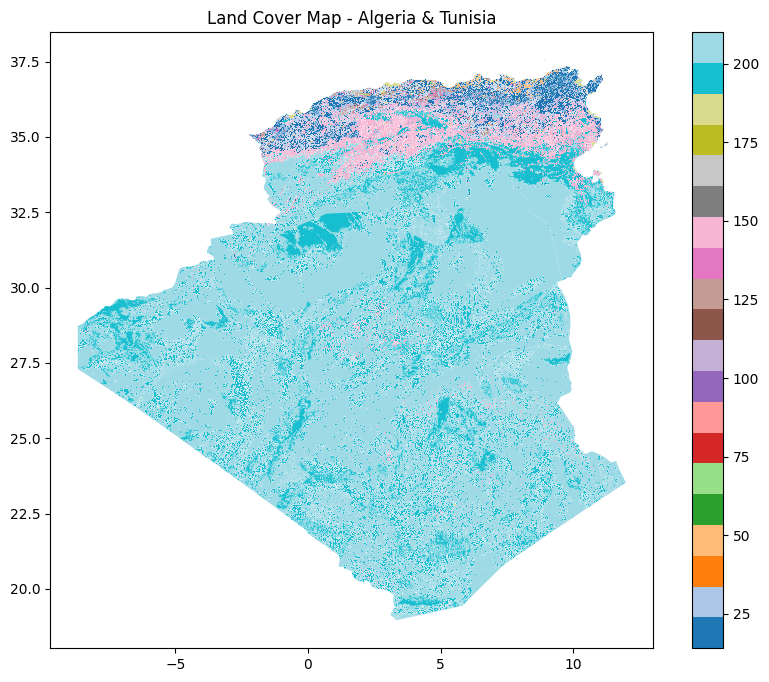

In [39]:
#dominant land cover types.
landcover.plot(column='GRIDCODE', figsize=(10,8), legend=True, cmap='tab20')
plt.title("Land Cover Map - Algeria & Tunisia")
plt.show()

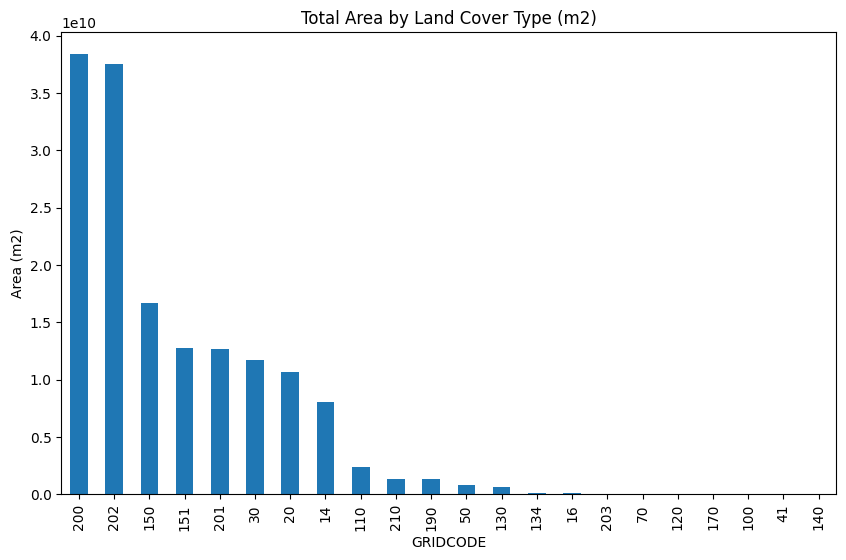

In [40]:


landcover.groupby('GRIDCODE')['AREA_M2'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10,6),
    title="Total Area by Land Cover Type (m2)"
)
plt.ylabel("Area (m2)")
plt.show()


In [41]:
landcover.total_bounds  # [minx, miny, maxx, maxy]


array([-8.67386723, 18.96002769, 11.97954845, 37.54393005])

In [42]:
"""landcover.boundary.plot(color='black', linewidth=0.01)
plt.title("Land Cover Boundary - Algeria & Tunisia")
plt.show()
"""

'landcover.boundary.plot(color=\'black\', linewidth=0.01)\nplt.title("Land Cover Boundary - Algeria & Tunisia")\nplt.show()\n'

In [43]:
print(landcover.isnull().sum())
#landcover = landcover[landcover.is_valid]


ID                0
GRIDCODE          0
AREA          52059
LCCCODE       52059
AREA_M2      386454
LCCCode_1    386454
geometry          0
dtype: int64


In [44]:
summary = (
    landcover.groupby('GRIDCODE')
    .agg(count=('GRIDCODE', 'count'), total_area_km2=('AREA_M2', 'sum'))
    .sort_values(by='total_area_km2', ascending=False)
)

print(summary)


           count  total_area_km2
GRIDCODE                        
200       172221    3.837877e+10
202        25951    3.753510e+10
150        47560    1.671428e+10
151        24520    1.271807e+10
201        61857    1.270876e+10
30         24856    1.170477e+10
20         31891    1.069241e+10
14         14872    8.039823e+09
110        16002    2.333276e+09
210          538    1.367083e+09
190          145    1.314558e+09
50          2575    7.758618e+08
130         8248    5.866878e+08
134         5432    1.275728e+08
16           550    1.218353e+08
203            8    5.055702e+07
70           818    2.753188e+07
120          405    2.204762e+06
170            6    1.839921e+06
100           49    6.899220e+05
41             8    0.000000e+00
140            1    0.000000e+00


### 3. Climate Data Exploration

In [45]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Example for one raster (repeat for tmax, tmin)
prec_path = "../data/processed/Climate/wc2.1_cruts4.09_5m_prec_2020-02_clipped.tif"
tmax_path = "../data/processed/Climate/wc2.1_cruts4.09_5m_tmax_2020-02_clipped.tif"
tmin_path = "../data/processed/Climate/wc2.1_cruts4.09_5m_tmin_2020-02_clipped.tif"

prec_ds = rasterio.open(prec_path)
tmax_ds = rasterio.open(tmax_path)
tmin_ds = rasterio.open(tmin_path)



In [46]:
print("PREC metadata:", prec_ds.meta)
print("TMAX metadata:", tmax_ds.meta)
print("TMIN metadata:", tmin_ds.meta)


PREC metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 249, 'height': 224, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.08333333333333333, 0.0, -8.75,
       0.0, -0.08333333333333333, 37.583333333333336)}
TMAX metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 249, 'height': 224, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Aff

In [47]:
prec_ds.crs == tmax_ds.crs == tmin_ds.crs  # lzm True


True

In [48]:
#compute basic stats
prec = prec_ds.read(1)
tmax = tmax_ds.read(1)
tmin = tmin_ds.read(1)

def raster_stats(arr, name):
    arr = np.where(arr == prec_ds.nodata, np.nan, arr)
    print(f"{name} - min: {np.nanmin(arr):.2f}, max: {np.nanmax(arr):.2f}, mean: {np.nanmean(arr):.2f}, std: {np.nanstd(arr):.2f}")

raster_stats(prec, "Precipitation")
raster_stats(tmax, "Tmax")
raster_stats(tmin, "Tmin")


Precipitation - min: 0.00, max: 72.95, mean: 2.19, std: 5.05
Tmax - min: 7.75, max: 29.00, mean: 22.75, std: 3.49
Tmin - min: -0.50, max: 13.00, mean: 8.05, std: 2.25


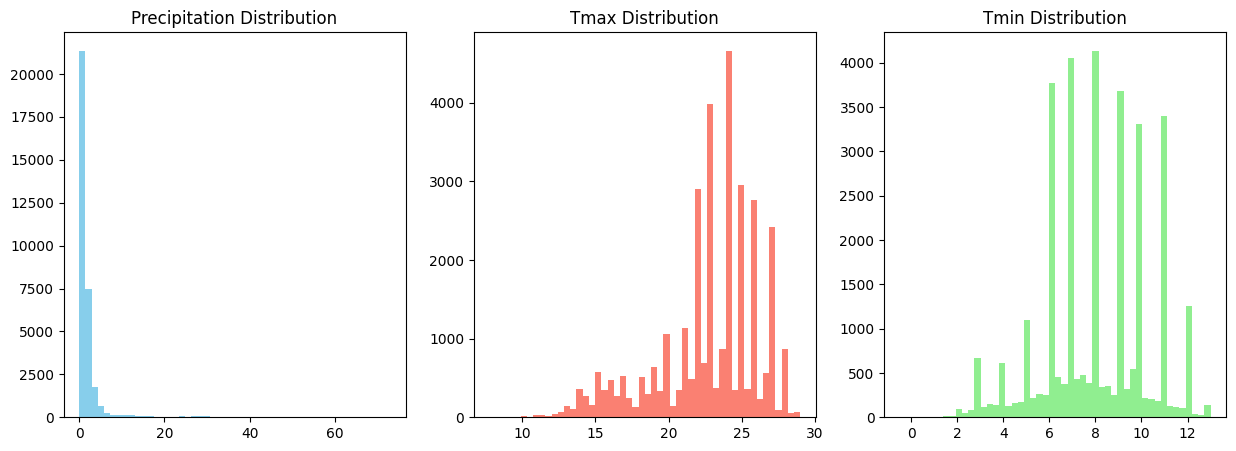

In [49]:
#Histograms
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].hist(prec.flatten(), bins=50, color='skyblue')
axes[0].set_title("Precipitation Distribution")
axes[1].hist(tmax.flatten(), bins=50, color='salmon')
axes[1].set_title("Tmax Distribution")
axes[2].hist(tmin.flatten(), bins=50, color='lightgreen')
axes[2].set_title("Tmin Distribution")
plt.show()


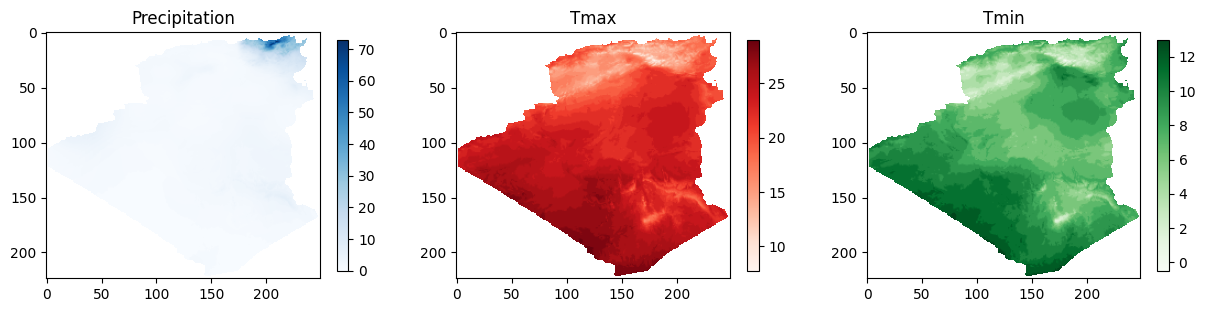

In [50]:
# visualize the maps for the 3
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for ax, data, title, cmap in zip(
    axes, [prec, tmax, tmin],
    ["Precipitation", "Tmax", "Tmin"],
    ["Blues", "Reds", "Greens"]
):
    im = ax.imshow(data, cmap=cmap)
    ax.set_title(title)
    plt.colorbar(im, ax=ax, shrink=0.6)
plt.show()


In [51]:
valid_mask = (~np.isnan(tmax)) & (~np.isnan(tmin))
corr = np.corrcoef(tmax[valid_mask], tmin[valid_mask])[0,1]
print("Correlation Tmax–Tmin:", corr)

valid_mask = (~np.isnan(prec)) & (~np.isnan(tmax))
corr = np.corrcoef(prec[valid_mask], tmax[valid_mask])[0,1]
print("Correlation Precip–Tmax:", corr)

valid_mask = (~np.isnan(prec)) & (~np.isnan(tmin))
corr = np.corrcoef(prec[valid_mask], tmin[valid_mask])[0,1]
print("Correlation Precip–Tmin:", corr)


Correlation Tmax–Tmin: 0.8471673022340938
Correlation Precip–Tmax: -0.36273351542741694
Correlation Precip–Tmin: -0.2107693843167748


In [52]:
print("High Tmax threshold:", np.nanpercentile(tmax, 95))
print("Low Tmin threshold:", np.nanpercentile(tmin, 5))


High Tmax threshold: 27.0
Low Tmin threshold: 4.0


In [53]:
import geopandas as gpd
import rasterio
from rasterio.sample import sample_gen
import pandas as pd
from shapely.geometry import Point

# 1️⃣ Load fire dataset
fire = pd.read_csv("..\data\processed\Fire\combined_fire_data_2024.csv")
fire_gdf = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs="EPSG:4326"
)

# 2️⃣ Open climate rasters
prec_ds = rasterio.open("..\data\processed\Climate\wc2.1_cruts4.09_5m_prec_2020-02_clipped.tif")
tmax_ds = rasterio.open("..\data\processed\Climate\wc2.1_cruts4.09_5m_tmax_2020-02_clipped.tif")
tmin_ds = rasterio.open("..\data\processed\Climate\wc2.1_cruts4.09_5m_tmin_2020-02_clipped.tif")

# 3️⃣ Extract raster values at fire point coordinates
def extract_raster_values(dataset, gdf, col_name):
    coords = [(x,y) for x, y in zip(gdf.geometry.x, gdf.geometry.y)]
    values = [val[0] if val[0] != dataset.nodata else None for val in dataset.sample(coords)]
    gdf[col_name] = values

extract_raster_values(prec_ds, fire_gdf, "prec")
extract_raster_values(tmax_ds, fire_gdf, "tmax")
extract_raster_values(tmin_ds, fire_gdf, "tmin")

fire_gdf.head()


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,geometry,prec,tmax,tmin
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,2,277.66,1.24,N,2,POINT (9.872 27.72818),2.900,23.00,6.75
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.05,1.57,N,2,POINT (9.77909 28.63288),2.750,21.75,5.00
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,2,277.04,1.34,N,2,POINT (9.77953 28.64012),2.750,21.75,5.00
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,2,257.28,5.21,N,2,POINT (6.25409 36.74886),23.525,16.00,7.75
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,2,272.08,1.58,N,2,POINT (4.44782 35.87978),0.575,15.50,5.75


In [54]:
# Relationships Between Fire & Climate
fire_gdf[['prec', 'tmax', 'tmin']].corr()

,prec,tmax,tmin
prec,1.000000,-0.391376,0.024761
tmax,-0.391376,1.000000,0.461624
tmin,0.024761,0.461624,1.000000


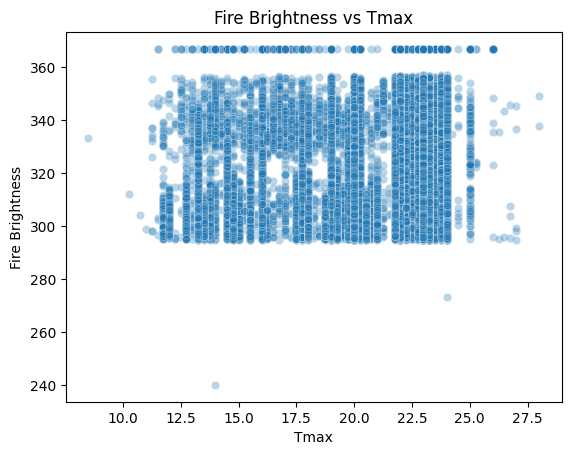

In [55]:
# Fire vs Temperature Scatter
import seaborn as sns

def plot_scatter(x, y, x_label, y_label, title):
    sns.scatterplot(data=fire_gdf, x=x, y=y, alpha=0.3)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# x values : tmax, tmin, prec
# y values : 'latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date','acq_time', 'satellite', 'instrument', 'confidence', 'version','bright_ti5', 'frp', 'daynight', 'type'

plot_scatter('tmax', 'bright_ti4', 'Tmax', 'Fire Brightness', 'Fire Brightness vs Tmax')


C:\Users\lemon\AppData\Local\Temp\ipykernel_4948\609917143.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_counts = fire_gdf.groupby('tmax_bin').size()


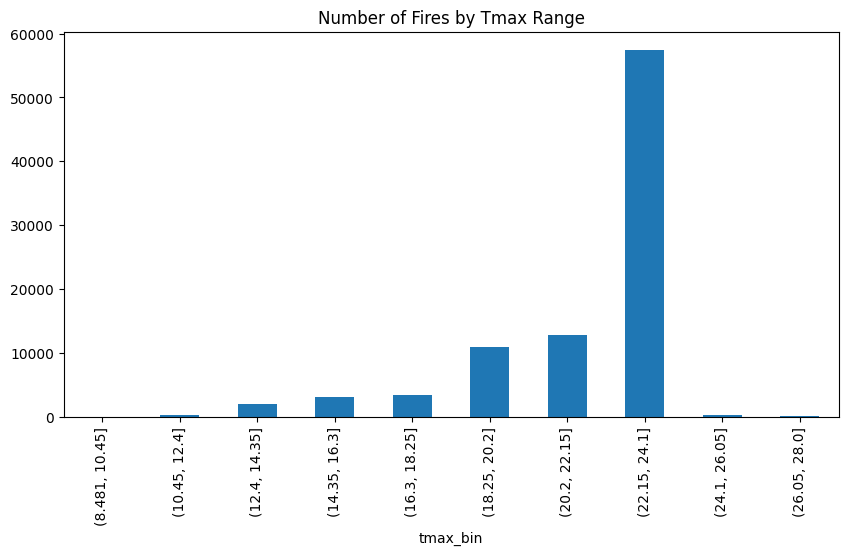

In [56]:
# Fire Frequency by Temperature Range
fire_gdf['tmax_bin'] = pd.cut(fire_gdf['tmax'], bins=10)
fire_counts = fire_gdf.groupby('tmax_bin').size()
fire_counts.plot(kind='bar', figsize=(10,5), title='Number of Fires by Tmax Range')
plt.show()


C:\Users\lemon\AppData\Local\Temp\ipykernel_4948\4269890710.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_gdf.groupby('prec_bin').size().plot(kind='bar', title='Fires by Precipitation Level')


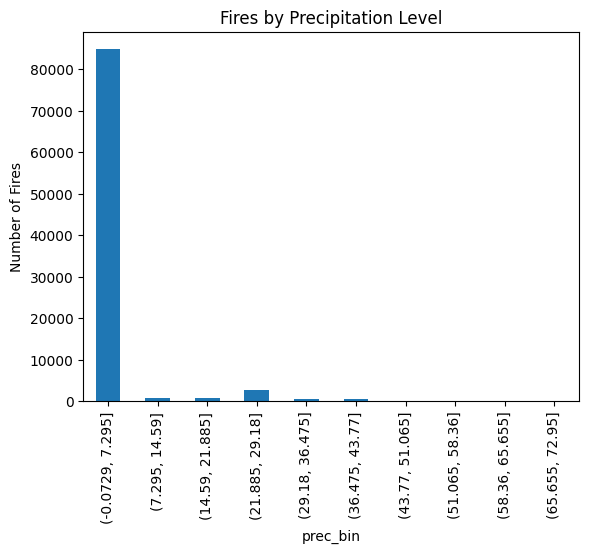

In [57]:
# Fire Frequency vs. Rainfall
fire_gdf['prec_bin'] = pd.cut(fire_gdf['prec'], bins=10)
fire_gdf.groupby('prec_bin').size().plot(kind='bar', title='Fires by Precipitation Level')
plt.ylabel("Number of Fires")
plt.show()


In [58]:
#Spatial Aggregation
fire_gdf['lat_bin'] = fire_gdf['latitude'].round(1)
fire_gdf['lon_bin'] = fire_gdf['longitude'].round(1)
grid_summary = fire_gdf.groupby(['lat_bin', 'lon_bin']).agg({
    'tmax':'mean',
    'tmin':'mean',
    'prec':'mean',
    'latitude':'count'
}).rename(columns={'latitude':'fire_count'}).reset_index()



In [59]:
grid_summary

,lat_bin,lon_bin,tmax,tmin,prec,fire_count
0,19.6,5.7,28.000000,13.00,0.000000,1
1,19.6,5.8,28.000000,13.00,0.000000,1
2,20.0,3.0,27.000000,11.00,1.200000,1
3,20.4,2.6,27.000000,11.50,1.325000,1
4,22.6,5.7,22.500000,7.50,0.600000,4
...,...,...,...,...,...,...
1330,37.2,10.1,17.750000,7.75,35.025002,1
1331,37.3,9.5,17.250000,7.50,43.000000,2
1332,37.3,9.6,17.333334,7.50,42.625000,9
1333,37.3,9.7,17.750000,7.75,40.525002,17


In [60]:
import geopandas as gpd

fire_in_lc = gpd.sjoin(fire_gdf, landcover, how="inner", predicate="within")

fire_counts = (
    fire_in_lc.groupby("GRIDCODE")
    .size()
    .reset_index(name="fire_count")
)

fire_counts.head()


,GRIDCODE,fire_count
0,14,593
1,16,1
2,20,1205
3,30,2487
4,50,66


In [61]:
climate_summary = (
    fire_in_lc.groupby("GRIDCODE")
    .agg(
        mean_tmax=("tmax", "mean"),
        mean_tmin=("tmin", "mean"),
        mean_prec=("prec", "mean"),
        fire_count=("GRIDCODE", "count")
    )
    .reset_index()
)


In [62]:
landcover_stats = landcover.merge(climate_summary, on="GRIDCODE", how="left")
landcover_stats['fire_density'] = landcover_stats['fire_count'] / landcover_stats['AREA']


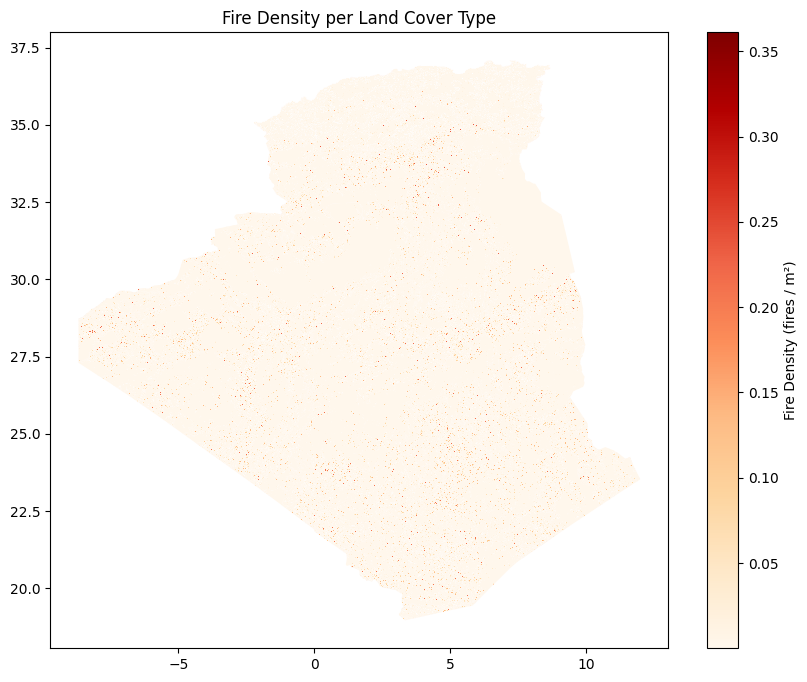

In [63]:
landcover_stats.plot(
    column="fire_density",
    cmap="OrRd",
    legend=True,
    figsize=(10,8),
    legend_kwds={"label": "Fire Density (fires / m²)"}
)
plt.title("Fire Density per Land Cover Type")
plt.show()


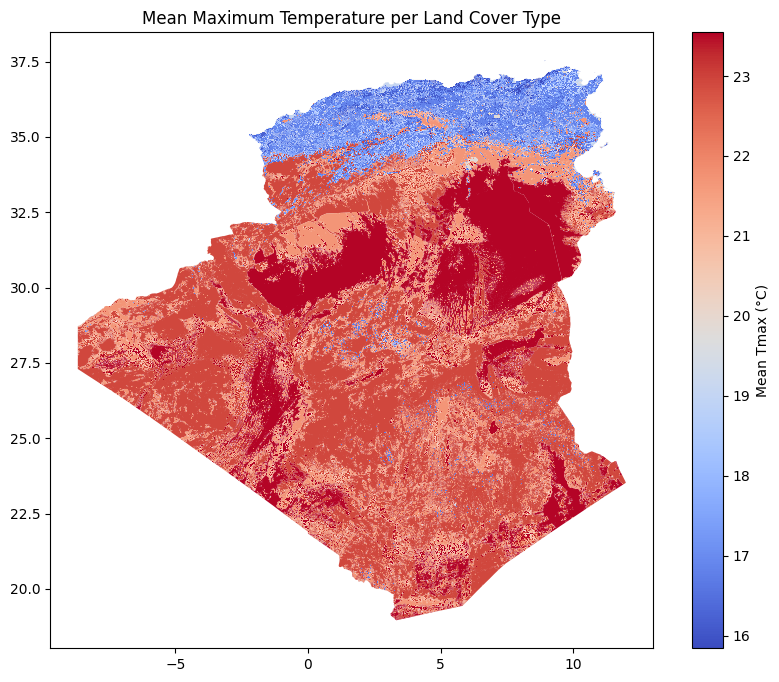

In [64]:
landcover_stats.plot(
    column="mean_tmax",
    cmap="coolwarm",
    legend=True,
    figsize=(10,8),
    legend_kwds={"label": "Mean Tmax (°C)"}
)
plt.title("Mean Maximum Temperature per Land Cover Type")
plt.show()


### 4. Elevation Analysis

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 4958, 'height': 4461, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004166666666666664, 0.0, -8.675138888889023,
       0.0, -0.004166666666666664, 37.545694444444365)}


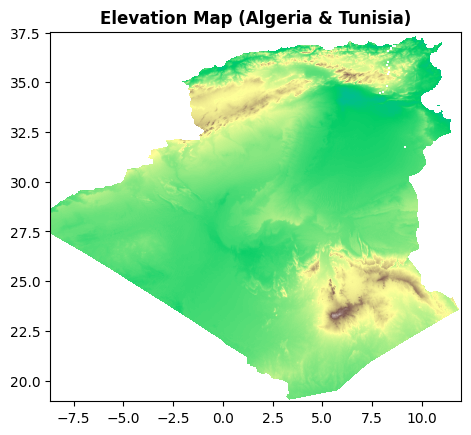

In [65]:
# --- ELEVATION ANALYSIS ---

import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

elev_path = "../data/processed/Elevation/elevation_clipped.tif"


elev_ds = rasterio.open(elev_path)

print(elev_ds.meta)

with rasterio.open(elev_path) as src:
    data = src.read(1)
    show(src, cmap='terrain', title="Elevation Map (Algeria & Tunisia)")





In [66]:
elev = elev_ds.read(1)
elev = np.where(elev == elev_ds.nodata, np.nan, elev)


In [67]:
print(f"Min: {np.nanmin(elev):.2f} m")
print(f"Max: {np.nanmax(elev):.2f} m")
print(f"Mean: {np.nanmean(elev):.2f} m")
print(f"Std: {np.nanstd(elev):.2f} m")


Min: -872.00 m
Max: 2877.00 m
Mean: 538.56 m
Std: 324.21 m


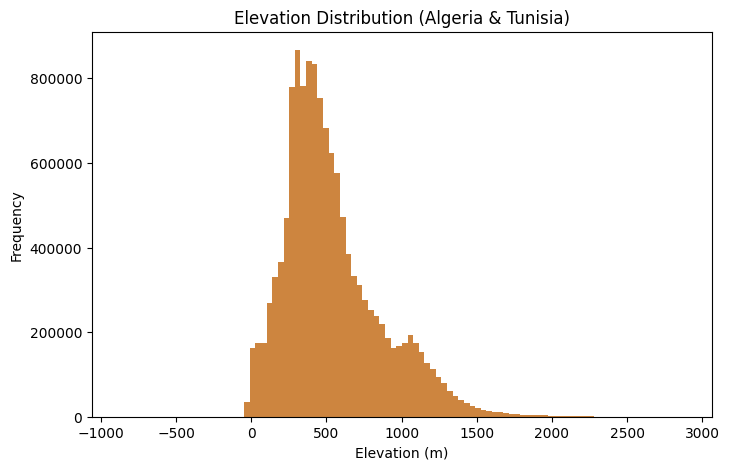

In [68]:
#Elevation Distribution
plt.figure(figsize=(8,5))
plt.hist(elev.flatten(), bins=100, color='peru')
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.title("Elevation Distribution (Algeria & Tunisia)")
plt.show()


In [69]:
# Correlate Elevation with Climate and Fire
from rasterio.sample import sample_gen

coords = [(x, y) for x, y in zip(fire_gdf.geometry.x, fire_gdf.geometry.y)]
fire_gdf['elevation'] = [val[0] if val[0] != elev_ds.nodata else None for val in elev_ds.sample(coords)]

fire_gdf.head()


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,type,geometry,prec,tmax,tmin,tmax_bin,prec_bin,lat_bin,lon_bin,elevation
0,27.72818,9.87200,295.51,0.76,0.77,2024-01-01,3,N20,VIIRS,n,...,2,POINT (9.872 27.72818),2.900,23.00,6.75,"(22.15, 24.1]","(-0.0729, 7.295]",27.7,9.9,486.0
1,28.63288,9.77909,301.80,0.79,0.78,2024-01-01,3,N20,VIIRS,n,...,2,POINT (9.77909 28.63288),2.750,21.75,5.00,"(20.2, 22.15]","(-0.0729, 7.295]",28.6,9.8,703.0
2,28.64012,9.77953,298.65,0.79,0.78,2024-01-01,3,N20,VIIRS,n,...,2,POINT (9.77953 28.64012),2.750,21.75,5.00,"(20.2, 22.15]","(-0.0729, 7.295]",28.6,9.8,711.0
3,36.74886,6.25409,338.04,0.46,0.39,2024-01-01,141,N20,VIIRS,n,...,2,POINT (6.25409 36.74886),23.525,16.00,7.75,"(14.35, 16.3]","(21.885, 29.18]",36.7,6.3,28.0
4,35.87978,4.44782,309.49,0.41,0.37,2024-01-01,141,N20,VIIRS,n,...,2,POINT (4.44782 35.87978),0.575,15.50,5.75,"(14.35, 16.3]","(-0.0729, 7.295]",35.9,4.4,741.0


C:\Users\lemon\AppData\Local\Temp\ipykernel_4948\413067990.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_gdf.groupby('elev_bin').size().plot(kind='bar', figsize=(10,5))


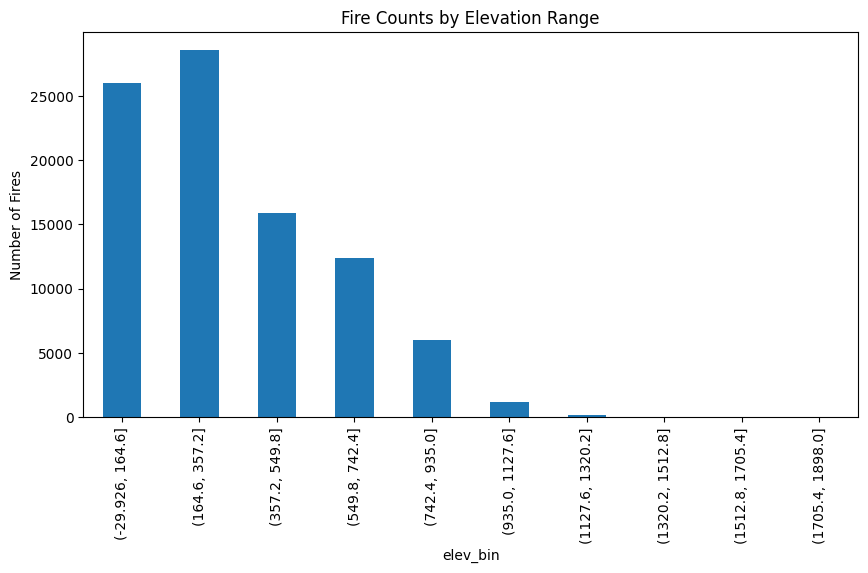

In [70]:
# Fire Frequency by Elevation Range
import pandas as pd
fire_gdf['elev_bin'] = pd.cut(fire_gdf['elevation'], bins=10)
fire_gdf.groupby('elev_bin').size().plot(kind='bar', figsize=(10,5))
plt.title("Fire Counts by Elevation Range")
plt.ylabel("Number of Fires")
plt.show()


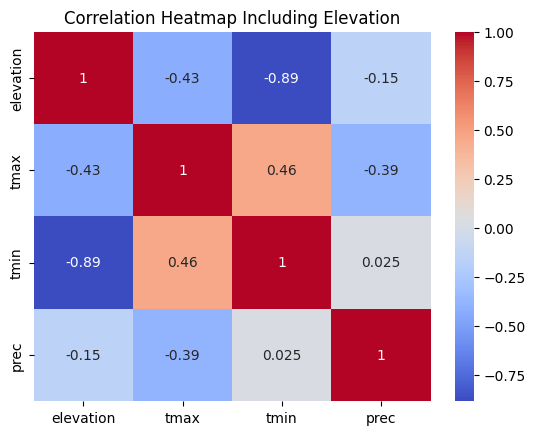

In [71]:
#fire_gdf[['elevation','tmax','tmin','prec']].corr()

# plot correlation heatmap
import seaborn as sns
sns.heatmap(fire_gdf[['elevation','tmax','tmin','prec']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Including Elevation")
plt.show()

### 5. Soil Data Exploration

In [72]:
# --- SOIL DATA EXPLORATION ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

soil = pd.read_csv("../data/processed/Soil/soil_data_layers_filtered.csv")

print(soil.info())
soil.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58405 entries, 0 to 58404
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COARSE         58405 non-null  int64  
 1   SAND           58405 non-null  int64  
 2   SILT           58405 non-null  int64  
 3   CLAY           58405 non-null  int64  
 4   TEXTURE_USDA   57116 non-null  float64
 5   TEXTURE_SOTER  58405 non-null  object 
 6   BULK           58405 non-null  float64
 7   REF_BULK       57116 non-null  float64
 8   ORG_CARBON     57733 non-null  float64
 9   PH_WATER       58405 non-null  float64
 10  TOTAL_N        58405 non-null  float64
 11  CN_RATIO       58405 non-null  float64
 12  CEC_SOIL       58405 non-null  int64  
 13  CEC_CLAY       58405 non-null  int64  
 14  CEC_EFF        58405 non-null  float64
 15  TEB            58405 non-null  float64
 16  BSAT           58405 non-null  int64  
 17  ALUM_SAT       58405 non-null  int64  
 18  ESP   

,COARSE,SAND,SILT,CLAY,TEXTURE_USDA,TEXTURE_SOTER,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_CLAY,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,ID
0,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,46,6.0,5.0,59,0,2,0.0,0.1,1,667
1,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,46,6.0,5.0,59,0,2,0.0,0.1,1,668
2,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,46,6.0,5.0,59,0,2,0.0,0.1,1,669
3,5,67,18,15,11.0,C,1.35,1.63,1.062,6.3,...,46,6.0,5.0,59,0,2,0.0,0.1,1,670
4,2,24,52,24,7.0,M,1.44,1.76,1.475,5.2,...,20,6.0,4.0,41,50,2,0.0,0.1,0,695


In [73]:
# missing values per column
soil.isnull().sum().sort_values(ascending=False)


TEXTURE_USDA     1289
REF_BULK         1289
ORG_CARBON        672
SILT                0
CLAY                0
SAND                0
COARSE              0
BULK                0
TEXTURE_SOTER       0
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
ID                  0
dtype: int64

In [74]:
soil.describe().T


,count,mean,std,min,25%,50%,75%,max
COARSE,58405.0,11.184573,8.437106,-9.00,4.000,10.000,18.00,49.000000
SAND,58405.0,46.051879,17.348953,-9.00,36.000,43.000,55.00,94.000000
SILT,58405.0,30.209023,11.973649,-9.00,23.000,31.000,38.00,67.000000
CLAY,58405.0,21.282664,10.549217,-9.00,16.000,20.000,27.00,65.000000
TEXTURE_USDA,57116.0,8.602581,2.500621,3.00,7.000,9.000,11.00,12.000000
BULK,58405.0,1.226432,0.863178,-9.00,1.290,1.370,1.46,1.760000
REF_BULK,57116.0,1.707009,0.161498,0.97,1.650,1.710,1.81,2.090000
ORG_CARBON,57733.0,2.706419,6.243177,-9.00,0.711,1.316,2.20,49.680000
PH_WATER,58405.0,6.396850,1.924548,-9.00,5.700,6.600,7.70,9.000000
TOTAL_N,58405.0,1.720019,2.559947,-9.00,0.800,1.140,1.78,23.480000


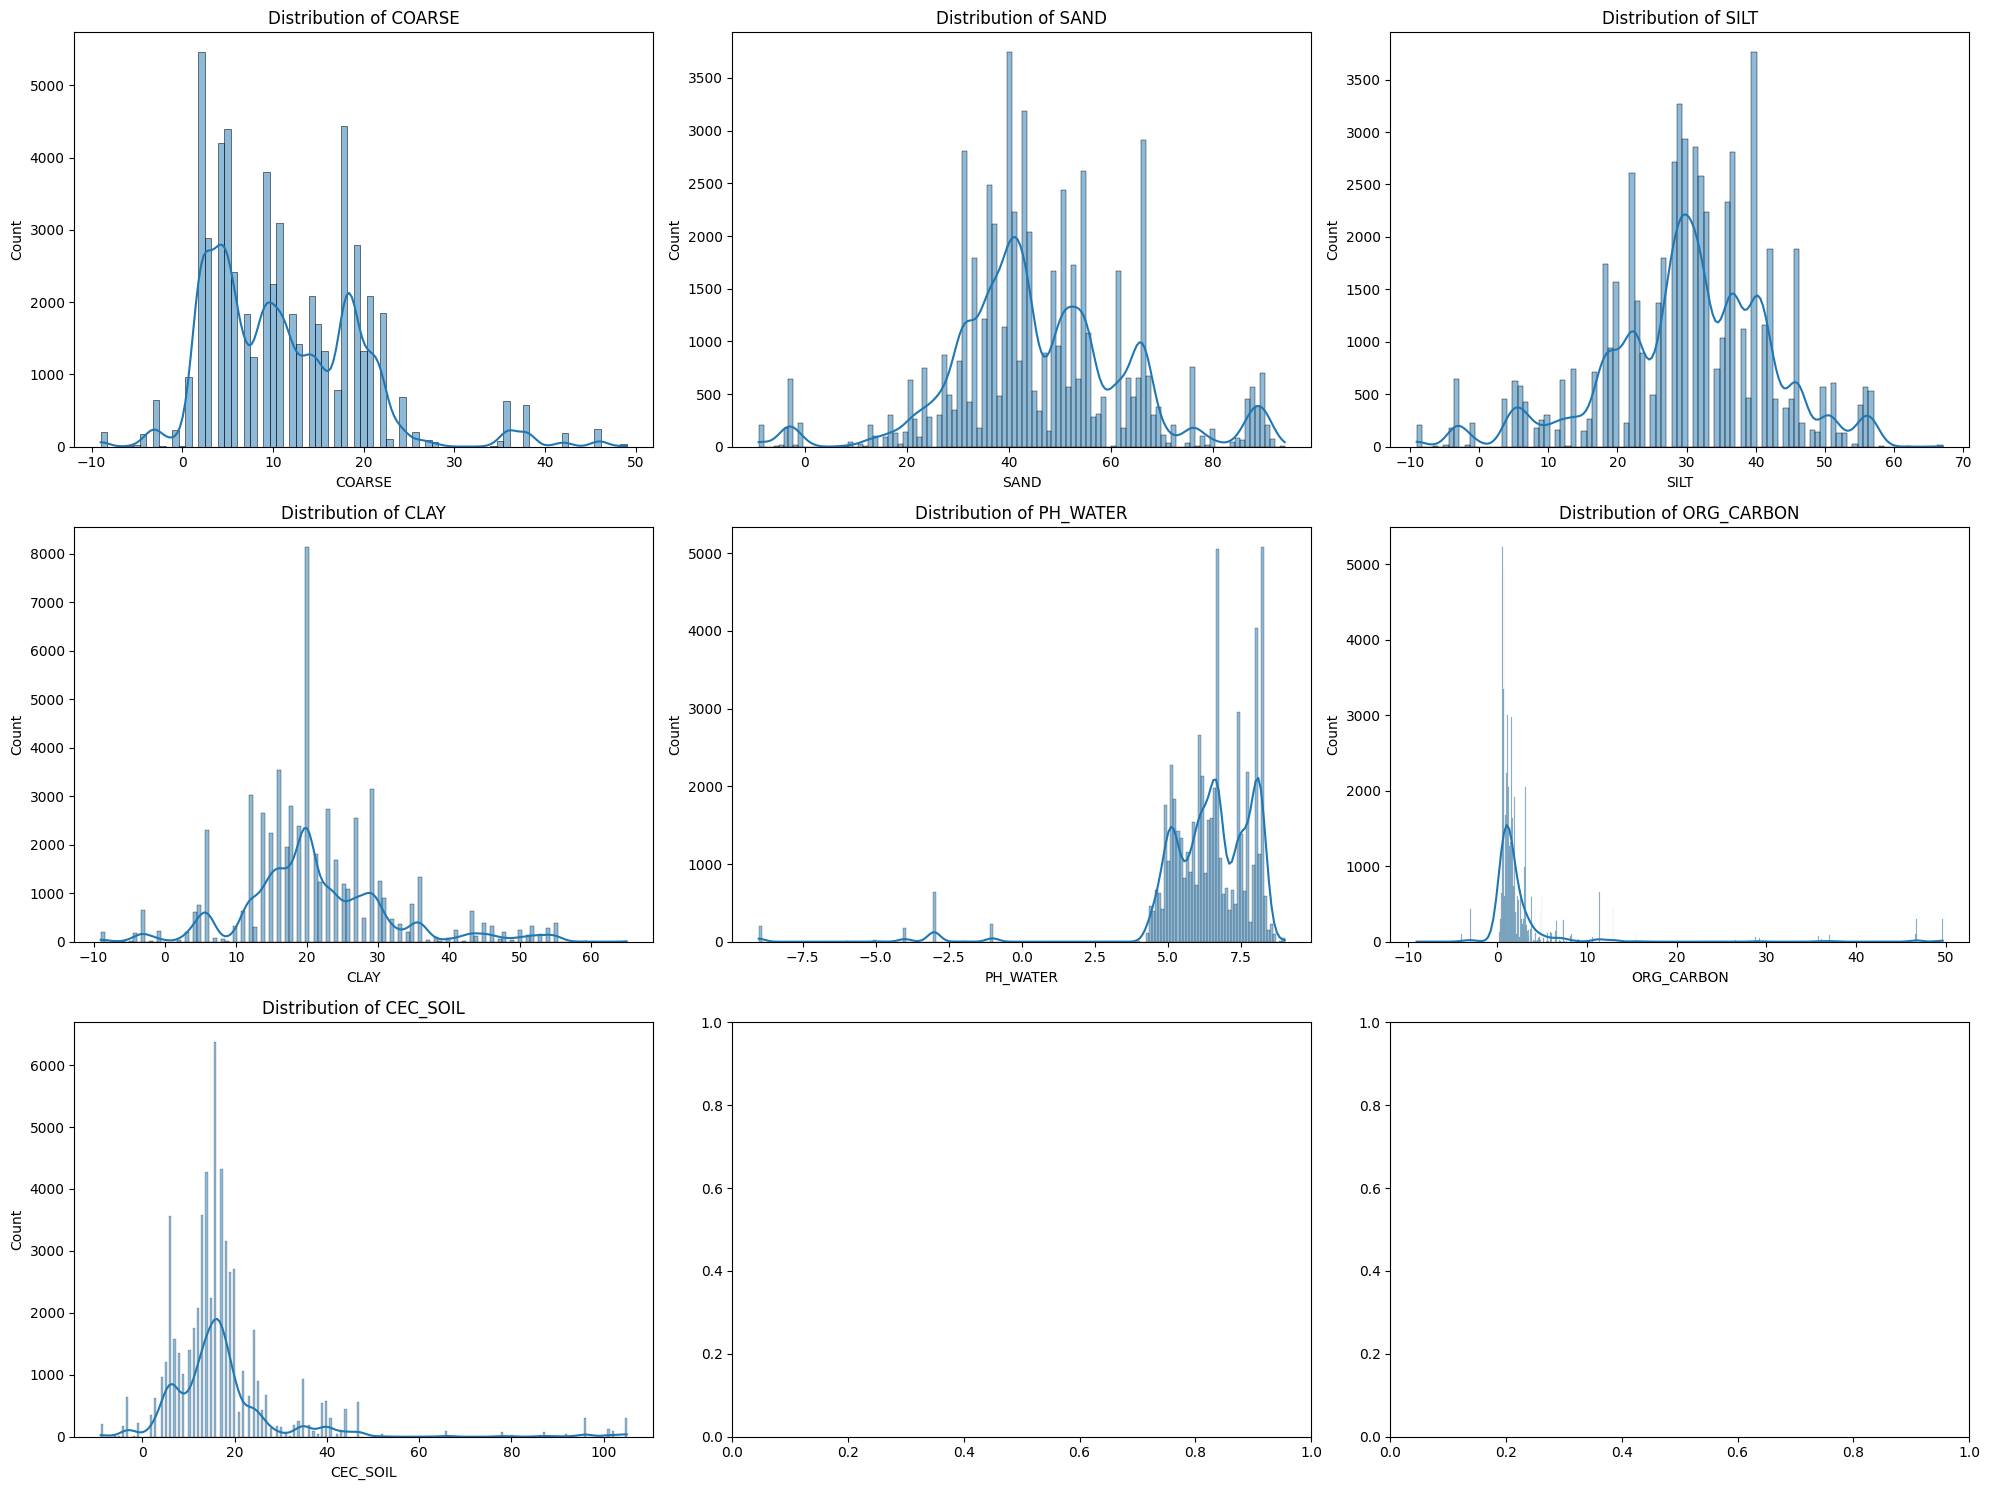

In [75]:
# Distribution Plots
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_plot = ["COARSE","SAND","SILT","CLAY","PH_WATER","ORG_CARBON","CEC_SOIL"]
# plot in one figure
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for ax, col in zip(axes.flatten(), cols_to_plot):
    sns.histplot(soil[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


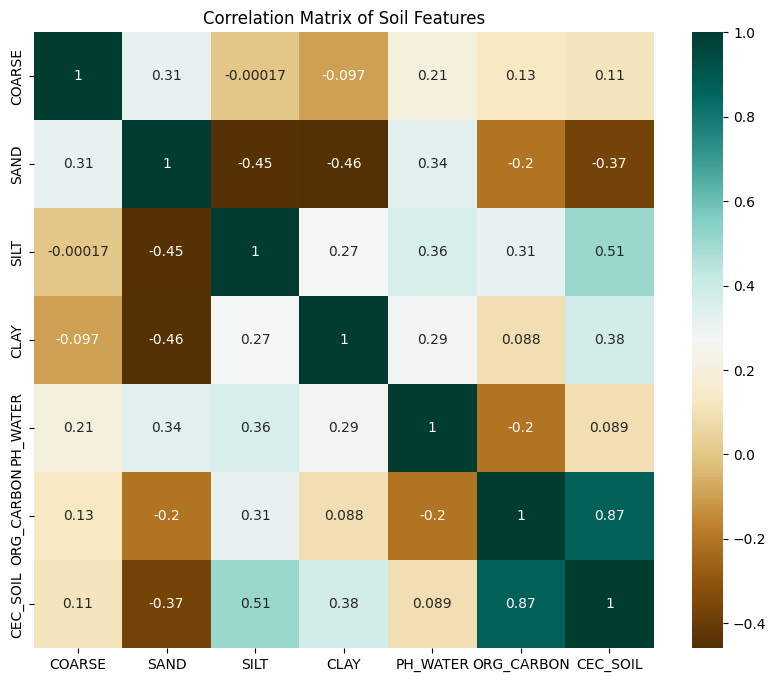

In [76]:
# --- CORRELATION HEATMAP ---
numeric_cols = cols_to_plot
plt.figure(figsize=(10,8))
sns.heatmap(soil[numeric_cols].corr(), annot=True, cmap='BrBG')
plt.title("Correlation Matrix of Soil Features")
plt.show()

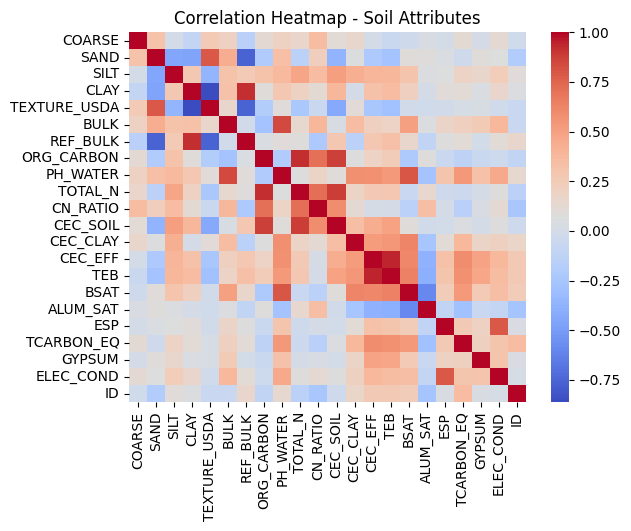

In [77]:
# Correlation
corr = soil.select_dtypes('number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap - Soil Attributes")
plt.show()


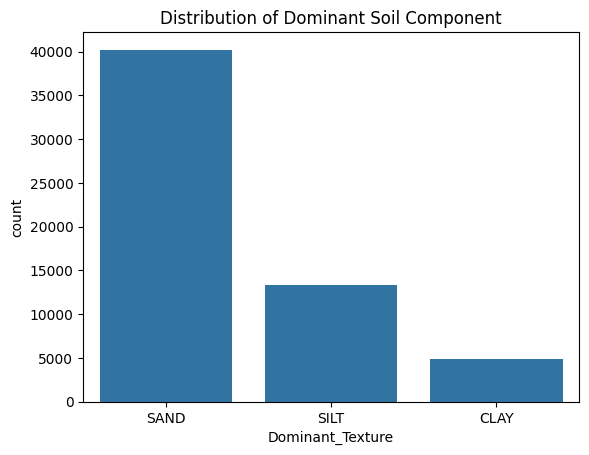

In [78]:
# plot count of dominant soil component
soil['Dominant_Texture'] = soil[['SAND','SILT','CLAY']].idxmax(axis=1)
sns.countplot(data=soil, x='Dominant_Texture')
plt.title("Distribution of Dominant Soil Component")
plt.show()
